In [20]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error
import ta

In [21]:
# Load the dataset

#data = pd.read_csv('/Users/saimasultana/AAPL.csv')
data = pd.read_csv(data_path)

# Display the first few rows of the dataset to understand its structure
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,30/09/2016,28.115000,28.342501,27.950001,28.262501,26.134748,145516400
1,03/10/2016,28.177500,28.262501,28.070000,28.129999,26.012228,86807200
2,04/10/2016,28.264999,28.577499,28.157499,28.250000,26.123190,118947200
3,05/10/2016,28.350000,28.415001,28.172501,28.262501,26.134748,85812400
4,06/10/2016,28.424999,28.584999,28.282499,28.472500,26.328941,115117200


In [22]:
# Convert 'Date' to datetime and sort the dataframe by date
data['Date'] = pd.to_datetime(data['Date'], dayfirst='False')
data.sort_values('Date', inplace=True)

# Feature Engineering: Creating year, month, and day features from 'Date'
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

In [23]:
# Calculate Daily Returns
data['Daily_Return'] = data['Close'].pct_change()

In [24]:
# Calculate Volatility (Standard Deviation of Daily Returns)
window_size = 20  # You can adjust the window size as needed
data['Volatility'] = data['Daily_Return'].rolling(window=window_size).std()

In [25]:
# Calculate Moving Averages
data['SMA_20'] = ta.trend.sma_indicator(data['Close'], window=20)  # 20-day Simple Moving Average
data['SMA_50'] = ta.trend.sma_indicator(data['Close'], window=50)  # 50-day Simple Moving Average

In [26]:
# Drop rows with NaN values
data.dropna(inplace=True)

In [27]:
# Select Features
features = ['Open', 'High', 'Low', 'Volume', 'SMA_20', 'SMA_50', 'Volatility']  # Select relevant features
X = data[features]
y = data['Close']  # Predicting the closing price

In [28]:
# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree model
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [29]:
# Predicting the stock prices 
y_pred = model.predict(X_test)

In [36]:
# Evaluating the model
DT_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
DT_r2 = r2_score(y_test, y_pred)

In [35]:
# Displaying performance metrics
print("RMSE:", DT_rmse)
print("R² score:", DT_r2)

RMSE: 0.24127585342719662
R² score: 0.9948708630883722


In [32]:
# From our experimentation; RMSE (Root Mean Square Error): 0.2413, R-squared score: 0.9949

# These metrics indicate that the model has a high degree of accuracy in predicting Apple's stock closing prices, with a very high R-squared score (0.9949) being close to 1, it indicate the model explains almost all variances in the data.

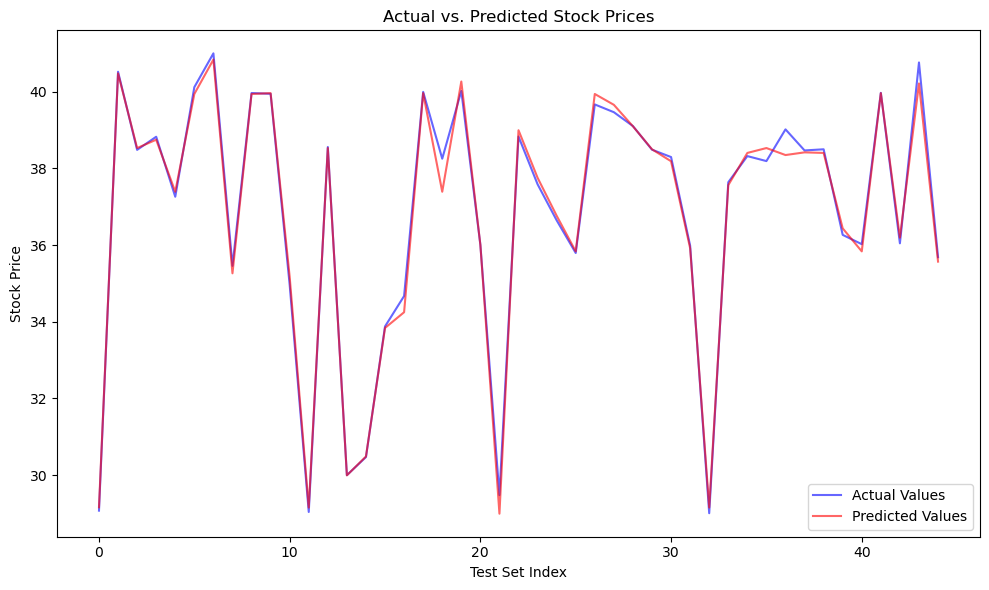

In [33]:
# Visualizing actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Values', color='blue', alpha=0.6)
plt.plot(y_pred, label='Predicted Values', color='red', alpha=0.6)
plt.title('Actual vs. Predicted Stock Prices')
plt.xlabel('Test Set Index')
plt.ylabel('Stock Price')
plt.legend()
plt.tight_layout()

In [19]:
# The plot shows the actual vs. predicted stock prices for the test set, where the actual values are in blue and the predicted values in red. The closeness of the two lines suggests that the model has done a good job at capturing the trend and fluctuations in Apple's stock prices.